In [45]:
import pandas as pd
import gdown
import os
import gzip
import json
import re
import sys
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [49]:
def load_data(file_name):
    #count = 
    data = []
    with gzip.open(file_name) as fin:
        for l in fin:
            d = json.loads(l)
            #count += 1
            data.append(d)
            
            #break if reaches the 100th line
            #if (head is not None) and (count > head):
                #break
    return data

In [50]:
reviews = load_data("goodreads_reviews_young_adult.json.gz")

In [51]:
books = load_data("goodreads_books_young_adult.json.gz")

In [52]:
reviews_df = pd.DataFrame(reviews)

In [8]:
reviews_df.columns

Index(['user_id', 'book_id', 'review_id', 'rating', 'review_text',
       'date_added', 'date_updated', 'read_at', 'started_at', 'n_votes',
       'n_comments'],
      dtype='object')

In [53]:
book_df = pd.DataFrame(books)

In [9]:
book_df.columns

Index(['isbn', 'text_reviews_count', 'series', 'country_code', 'language_code',
       'popular_shelves', 'asin', 'is_ebook', 'average_rating', 'kindle_asin',
       'similar_books', 'description', 'format', 'link', 'authors',
       'publisher', 'num_pages', 'publication_day', 'isbn13',
       'publication_month', 'edition_information', 'publication_year', 'url',
       'image_url', 'book_id', 'ratings_count', 'work_id', 'title',
       'title_without_series'],
      dtype='object')

In [55]:
file = open('all_books.obj', 'wb') 
pickle.dump(book_df, file )
file.close()

In [56]:
file = open('all_reviews.obj', 'wb') 
pickle.dump(reviews_df, file )
file.close()

In [286]:
len(reviews_df)

2389900

In [13]:

reviews_df = reviews_df.join(book_df[['book_id','language_code']].set_index('book_id'), on='book_id')

In [15]:
reviews_df = reviews_df.join(book_df[['book_id','country_code']].set_index('book_id'), on='book_id')

In [22]:
reviews_df['language_code'].unique()

array(['eng', 'en-US', 'en-CA', '', 'en-GB', 'ger', 'swe', 'fin', 'ind',
       'nl', 'kat', 'ara', 'por', 'tgl', 'fil', 'msa', 'spa', 'fre',
       'ita', 'tam', 'urd', 'hun', 'pol', 'nor', 'en', 'isl', 'cze',
       'tur', 'per', 'bul', 'rus', 'ben', 'dan', 'zho', 'mal', 'gre',
       'cat', 'lit', 'rum', 'est', 'hin', 'slo', 'nob', 'nno', 'scr',
       'lav', 'sqi', 'jpn', 'hye', 'vie', 'srp', 'bos', 'nld', 'tha',
       'slv', 'dua', 'sin', '--', 'kor', 'heb', 'pes', 'vls', 'pt-BR',
       'mar', 'cop', 'ukr', 'glg', 'mkd', 'es-MX', 'mul', 'mon', 'afr',
       'eus', 'sun'], dtype=object)

In [24]:
reviews_df=reviews_df[reviews_df["language_code"].isin(['eng', 'en-US', 'en-CA', '', 'en-GB'])]

In [25]:
len(reviews_df)

2286416

In [26]:
reviews_df[reviews_df['rating']==0]

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments,language_code,country_code
127,3ca7375dba942a760e53b726c472a7dd,2974811,b1ae6910b3fb307884d19b92e2958a7b,0,This book was not bad. 3.5 stars. I liked the ...,Sun Jun 07 13:19:02 -0700 2015,Sun Jun 07 13:19:02 -0700 2015,,,0,0,eng,US
157,0ef32090550901ead25cb0ea21c4d36b,22539,bcb321babe6391040c19e7f0f59f1d42,0,"Ugh, Joe Meno.",Tue Mar 18 19:55:01 -0700 2008,Fri Apr 04 09:22:05 -0700 2008,,,0,0,en-US,US
216,8e1db93d364acf3893ce998ebb8d57fc,15837671,fcd4800587a21d705b97d9d0e819adaf,0,JOHN GREEN IS MAKING ANOTHER BOOK?! \n OH MY G...,Fri Oct 11 05:38:54 -0700 2013,Fri Oct 11 05:43:22 -0700 2013,,,0,0,eng,US
246,4672eb229c808b792b8ea95f01f19784,41865,d543b61945f295c89857dd8d51829520,0,"(This, and the whole series) Needs a re-read. ...",Mon Jun 04 22:39:16 -0700 2012,Sun Feb 19 21:22:30 -0800 2017,,,0,0,en-US,US
253,4672eb229c808b792b8ea95f01f19784,18189424,2aa02285e754d0554a33a06940a69081,0,Markus Zusak made a post about how he enjoyed ...,Wed Jul 30 23:52:22 -0700 2014,Wed Jul 30 23:52:57 -0700 2014,,,0,0,,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2389838,b750095df02eca69c08ab7771e165269,7938275,cc6d6d6f506879e68f2792bce66fa732,0,All together this is a great story. The new st...,Thu Feb 07 06:28:26 -0800 2013,Thu Feb 07 06:28:26 -0800 2013,,,0,0,eng,US
2389844,bb2e1e5bb6cf00b465346c5aab0c5ba8,14061955,7ccdc0aa26859ca07e398e2cd41b1e2f,0,Fuck Mal.,Fri Jun 09 09:42:02 -0700 2017,Sun Sep 24 12:13:50 -0700 2017,,,0,0,eng,US
2389850,c9174473efac302c71adaa1ad2a46091,345627,fd1e3262c931e90155752596ce7718d2,0,ALRIGHT SO background first. \n I read through...,Tue Feb 09 04:00:31 -0800 2016,Wed Feb 17 16:44:29 -0800 2016,Thu Feb 18 16:44:29 -0800 2016,Tue Feb 09 00:00:00 -0800 2016,0,0,en-US,US
2389851,c9174473efac302c71adaa1ad2a46091,26172384,fdedbd1f13fafde635d371e88cfcb946,0,I received this book in a Goodreads giveaway. ...,Sun Nov 15 20:37:31 -0800 2015,Sun Jan 15 13:19:33 -0800 2017,Thu Feb 04 22:15:44 -0800 2016,Sun Nov 15 00:00:00 -0800 2015,0,0,eng,US


In [288]:
reviews_df.groupby("book_id").count()

,user_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
book_id,,,,,,,,,,
10000034,1,1,1,1,1,1,1,1,1,1
10000045,1,1,1,1,1,1,1,1,1,1
10000600,23,23,23,23,23,23,23,23,23,23
10000781,1,1,1,1,1,1,1,1,1,1
10000794,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
9998891,35,35,35,35,35,35,35,35,35,35
9999403,1,1,1,1,1,1,1,1,1,1
9999637,3,3,3,3,3,3,3,3,3,3


In [289]:
reviews_df.groupby("user_id").count()

,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
user_id,,,,,,,,,,
00000377eea48021d3002730d56aca9a,1,1,1,1,1,1,1,1,1,1
00009e46d18f223a82b22da38586b605,10,10,10,10,10,10,10,10,10,10
0000c3d51aa099745e93a4e99c4856c8,38,38,38,38,38,38,38,38,38,38
0001085188e302fc6b2568de45a5f56b,1,1,1,1,1,1,1,1,1,1
000157a6f8331e9c9a21252e1fee91d1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
ffff7cafdaf5196383cb2efca08fb6fe,257,257,257,257,257,257,257,257,257,257
ffff7cf38c717c8172ff5ba656cec6df,3,3,3,3,3,3,3,3,3,3
ffff943e2e329be4f410d874aaa3ae7f,1,1,1,1,1,1,1,1,1,1


In [27]:
reviews_df=reviews_df[reviews_df['rating']!=0]

In [28]:
len(reviews_df)

2206009

In [11]:
reviews_df.head()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,8842281e1d1347389f2ab93d60773d4d,2767052,248c011811e945eca861b5c31a549291,5,I cracked and finally picked this up. Very enj...,Wed Jan 13 13:38:25 -0800 2010,Wed Mar 22 11:46:36 -0700 2017,Sun Mar 25 00:00:00 -0700 2012,Fri Mar 23 00:00:00 -0700 2012,24,25
1,7504b2aee1ecb5b2872d3da381c6c91e,23302416,84c0936a0f9868f38e75d2f9a5cb761e,5,I read this book because my fifth grade son wa...,Wed Jan 21 18:40:59 -0800 2015,Wed Oct 26 03:44:13 -0700 2016,,,0,0
2,f8a89075dc6de14857561522e729f82c,18053080,785c8db878f4009da9741dea51f641da,4,Though the book started out slow and only star...,Sat Jan 11 17:58:41 -0800 2014,Tue Dec 02 11:43:07 -0800 2014,Sat Apr 12 00:00:00 -0700 2014,Fri Apr 11 00:00:00 -0700 2014,0,0
3,f8a89075dc6de14857561522e729f82c,17383543,34dc3c45d07e82718b05e73167259aef,2,"*Update - 10/27/13* - After some sleep, I thin...",Sun Apr 21 19:42:28 -0700 2013,Fri Aug 15 07:55:01 -0700 2014,Sat Oct 26 00:00:00 -0700 2013,Fri Oct 25 00:00:00 -0700 2013,0,0
4,f8a89075dc6de14857561522e729f82c,16651458,d8d6b590780256fef7ae4a9550fe3e0d,5,"This is a moving, heartbreaking, view into a l...",Fri Jan 11 11:42:42 -0800 2013,Fri Mar 01 09:31:01 -0800 2013,Mon Jan 14 00:00:00 -0800 2013,Sat Jan 12 00:00:00 -0800 2013,0,0


In [29]:
book_groups = reviews_df.groupby("book_id")['book_id'].count()

In [30]:
(book_groups>30).sum()

8574

In [31]:
new_reviews = reviews_df[reviews_df['book_id'].isin(book_groups[book_groups>30].index)]

In [32]:
user_groups =new_reviews.groupby("user_id")['user_id'].count()

In [33]:
new_reviews = new_reviews[new_reviews['user_id'].isin(user_groups[user_groups>50].index)]

In [34]:
user_groups =new_reviews.groupby("user_id")['user_id'].count()

In [35]:
(user_groups>50).sum()

7235

In [36]:
user_groups.describe()

count    7235.000000
mean      106.334900
std        78.565797
min        51.000000
25%        62.000000
50%        81.000000
75%       118.000000
max      1407.000000
Name: user_id, dtype: float64

In [37]:
new_reviews =new_reviews[['user_id','book_id','rating']]

In [38]:
file = open('selected_reviews.obj', 'wb') 
pickle.dump(new_reviews, file )
file.close()

In [44]:
books = new_reviews.groupby("book_id")['book_id'].count()

In [51]:
(books==1).sum()

38

In [52]:
book_df.head()

,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,...,publication_month,edition_information,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series
0,,1,[147734],US,,"[{'count': '1057', 'name': 'to-read'}, {'count...",B0056A00P4,true,4.04,B0056A00P4,...,,,,https://www.goodreads.com/book/show/12182387-t...,https://s.gr-assets.com/assets/nophoto/book/11...,12182387,4,285263,"The Passion (Dark Visions, #3)","The Passion (Dark Visions, #3)"
1,,2,[425995],US,,"[{'count': '1010', 'name': 'to-read'}, {'count...",B006KLYIAG,true,3.80,B006KLYIAG,...,,,,https://www.goodreads.com/book/show/20135365-h...,https://s.gr-assets.com/assets/nophoto/book/11...,20135365,5,18450480,Hope's Daughter,Hope's Daughter
2,0698143760,17,[493993],US,,"[{'count': '1799', 'name': 'fantasy'}, {'count...",,true,3.80,,...,3,,2014,https://www.goodreads.com/book/show/21401181-h...,https://images.gr-assets.com/books/1394747643m...,21401181,33,24802827,"Half Bad (Half Life, #1)","Half Bad (Half Life, #1)"
3,,9,[176160],US,eng,"[{'count': '7173', 'name': 'to-read'}, {'count...",B0042JSOQC,true,4.35,B004IYJDXY,...,,,,https://www.goodreads.com/book/show/10099492-t...,https://s.gr-assets.com/assets/nophoto/book/11...,10099492,152,10800440,Twelfth Grade Kills (The Chronicles of Vladimi...,Twelfth Grade Kills (The Chronicles of Vladimi...
4,0990662616,428,[],US,eng,"[{'count': '9481', 'name': 'to-read'}, {'count...",,false,3.71,B00MW0MTGE,...,10,Special Edition,2014,https://www.goodreads.com/book/show/22642971-t...,https://images.gr-assets.com/books/1406979059m...,22642971,1525,42144295,The Body Electric,The Body Electric


In [39]:
file = open("selected_reviews.obj",'rb')
data = pickle.load(file)
file.close()

In [40]:
books_id = data.groupby('book_id').count()

In [41]:
list_books = books_id.index
list_books

Index(['10025007', '1002520', '10025305', '10031701', '1003985', '10043376',
       '10044423', '10048874', '10048876', '10050',
       ...
       '9972882', '9975400', '9975659', '9975679', '9985697', '9989273',
       '9996290', '9996645', '9998891', '9999813'],
      dtype='object', name='book_id', length=8571)

In [42]:
book_df = book_df[book_df['book_id'].isin(books_id.index)]

In [43]:
book_df[book_df['description']==""]

,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,...,publication_month,edition_information,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series
1467,0142411221,384,[],US,en-US,"[{'count': '2737', 'name': 'to-read'}, {'count...",,false,3.55,B001Q8V6PS,...,,,,https://www.goodreads.com/book/show/3873353-ge...,https://images.gr-assets.com/books/1311650016m...,3873353,3546,3918546,Geek Charming,Geek Charming
2207,0142403180,182,[],US,,"[{'count': '1733', 'name': 'to-read'}, {'count...",,false,3.59,,...,,,,https://www.goodreads.com/book/show/227444.Gui...,https://s.gr-assets.com/assets/nophoto/book/11...,227444,3199,2308857,Guitar Girl,Guitar Girl
2218,0142412031,368,[],US,,"[{'count': '1920', 'name': 'to-read'}, {'count...",,false,3.84,B001BAGWCI,...,,,,https://www.goodreads.com/book/show/3250465-je...,https://images.gr-assets.com/books/1311650271m...,3250465,2540,3285522,"Jerk, California","Jerk, California"
3972,0375851917,158,[293915],US,en-US,"[{'count': '697', 'name': 'to-read'}, {'count'...",,false,3.24,B001EL6RJ2,...,,,,https://www.goodreads.com/book/show/2970898-cy...,https://s.gr-assets.com/assets/nophoto/book/11...,2970898,808,3001136,"Cycler (Cycler, #1)","Cycler (Cycler, #1)"
4086,0060760915,271,[],US,en-US,"[{'count': '1315', 'name': 'to-read'}, {'count...",,false,3.50,B001TJ2YAA,...,,,,https://www.goodreads.com/book/show/4749690-ju...,https://s.gr-assets.com/assets/nophoto/book/11...,4749690,1135,4814340,Jumped,Jumped
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87077,1492618551,369,[],US,eng,"[{'count': '3358', 'name': 'to-read'}, {'count...",,false,3.59,B01ENNQ2C4,...,9,,2016,https://www.goodreads.com/book/show/28755320-t...,https://images.gr-assets.com/books/1472553002m...,28755320,1922,56273615,The Cabin,The Cabin
87208,0385735251,149,[],US,,"[{'count': '719', 'name': 'to-read'}, {'count'...",,false,3.27,B001NLL6M6,...,8,,2009,https://www.goodreads.com/book/show/1343073.An...,https://images.gr-assets.com/books/1320434021m...,1343073,653,1332666,Andromeda Klein,Andromeda Klein
90489,,210,[],US,eng,"[{'count': '35442', 'name': 'to-read'}, {'coun...",,false,3.57,,...,4,1st Vintage Contemporaries Edition,1991,https://www.goodreads.com/book/show/1486923.Th...,https://images.gr-assets.com/books/1283800855m...,1486923,1324,2000351,The House on Mango Street,The House on Mango Street
90755,0060890355,652,[],US,,"[{'count': '3596', 'name': 'to-read'}, {'count...",,false,3.46,,...,9,,2005,https://www.goodreads.com/book/show/709054.The...,https://s.gr-assets.com/assets/nophoto/book/11...,709054,3669,2918941,The White Darkness,The White Darkness


In [19]:
nondescription = book_df[book_df['description']==""]['isbn']

In [82]:
list_isbn = list(nondescription[nondescription!=""])
list_isbn

['0142411221',
 '0142403180',
 '0142412031',
 '0375851917',
 '0060760915',
 '0147515025',
 '0439632501',
 '0375840850',
 '0786816015',
 '0316154393',
 '0060880414',
 '0316000957',
 '006155314X',
 '0316011827',
 '0060765259',
 '0061566128',
 '0374399565',
 '0439899737',
 '0312614799',
 '038573784X',
 '0385751087',
 '0061375845',
 '0312367953',
 '006440823X',
 '0553239716',
 '0316013897',
 '0373210299',
 '1590383990',
 '031072144X',
 '1582349010',
 '0763632074',
 '0440208351',
 '061877713X',
 '0062280783',
 '0440228352',
 '0385734530',
 '1905294964',
 '006172162X',
 '0590444794',
 '0525479023',
 '1416936408',
 '1442451556',
 '0312373791',
 '0142500593',
 '0316017175',
 '1595140786',
 '1558744630',
 '0061553174',
 '0385734662',
 '0316701343',
 '0061720402',
 '0060763841',
 '0316003727',
 '0440413141',
 '0061673110',
 '0316011711',
 '0385739540',
 '0060887478',
 '0399243895',
 '0739352350',
 '0765317672',
 '081091266X',
 '1599901676',
 '0439470145',
 '0002007452',
 '0375832580',
 '01424032

In [43]:
import requests as req
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import json
import pickle
from urllib.request import urlopen
import urllib.request
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from collections import defaultdict

In [115]:
import subprocess 

In [133]:
dic_desc={}

for i in list_isbn:
    subprocess.run("./download.sh '%s'" % str(i), shell=True)

    f = open("test.txt", "r")
    desc = f.read()
    first = desc.find('"description": {"type": "/type/text", "value":')
    last = desc.find('."}')
    description = desc[first+48:last]
    dic_desc[i]=description



  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2460    0  2460    0     0   1346      0 --:--:--  0:00:01 --:--:--  1345
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1415    0  1415    0     0   1727      0 --:--:-- --:--:-- --:--:--  1725
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2414    0  2414    0     0   3036      0 --:--:-- --:--:-- --:--:--  3032
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2369    0  2369    0     0   2979      0 --:--:-- --:--:-- --:--:--  2979
  % Total    % Received % Xferd  Average Speed   Tim

100  1536    0  1536    0     0   1564      0 --:--:-- --:--:-- --:--:--  1564
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1685    0  1685    0     0   2146      0 --:--:-- --:--:-- --:--:--  2146
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1100    0  1100    0     0   1344      0 --:--:-- --:--:-- --:--:--  1343
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2237    0  2237    0     0   2778      0 --:--:-- --:--:-- --:--:--  2775
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1610    0  1610    0     0   2025      0 --:--:

100  2553    0  2553    0     0   3105      0 --:--:-- --:--:-- --:--:--  3102
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2069    0  2069    0     0   2680      0 --:--:-- --:--:-- --:--:--  2676
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1707    0  1707    0     0   2117      0 --:--:-- --:--:-- --:--:--  2117
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2416    0  2416    0     0   2979      0 --:--:-- --:--:-- --:--:--  2975
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   905    0   905    0     0   1161      0 --:--:

In [135]:
dic_desc

{'0142411221': "Rich, spoiled, and popular high school senior Dylan is coerced into doing a documentary film with Josh, one of the school's geeks, who leads her to realize that the world does not revolve around her",
 '0142403180': '0", "info_url": "https://openlibrary.org/books/OL25554887M/Guitar_girl", "preview": "restricted", "preview_url": "https://archive.org/details/guitargirl00mann_668", "thumbnail_url": "https://covers.openlibrary.org/b/id/9813615-S.jpg", "details": {"publishers": ["Speak"], "isbn_10": ["0142403180"], "covers": [9813615], "full_title": "Guitar girl", "key": "/books/OL25554887M", "authors": [{"key": "/authors/OL1400394A", "name": "Sarra Manning"}], "ocaid": "guitargirl00mann_668", "publish_places": ["New York"], "isbn_13": ["9780142403181"], "pagination": "217 pages ;", "source_records": ["ia:guitargirl00mann_668", "promise:bwb_daily_pallets_2021-01-13"], "title": "Guitar girl", "dewey_decimal_class": ["823.914"], "number_of_pages": 217, "languages": [{"key": "/

In [139]:
new_dic_desc ={}
list_wo_desc =[]
for i in dic_desc.keys():
    if "info_url" in dic_desc[i]:
        list_wo_desc.append(i)
    else:
        new_dic_desc[i]=dic_desc[i]
    

In [147]:
print(len(new_dic_desc))
print(len(list_wo_desc))
print(len(list_isbn))
print(list_wo_desc)

45
52
97
['0142403180', '0147515025', '0439632501', '0316154393', '0316000957', '0316011827', '0061566128', '0312367953', '0553239716', '0373210299', '1590383990', '0763632074', '0440208351', '061877713X', '0062280783', '0385734530', '1905294964', '0590444794', '0525479023', '1416936408', '1442451556', '0142500593', '0316017175', '1595140786', '1558744630', '0316701343', '0060763841', '0316003727', '0060887478', '0739352350', '0765317672', '081091266X', '1599901676', '0439470145', '0002007452', '014240327X', '0743400283', '0439679966', '039924705X', '1416997857', '1416972277', '0142407577', '0385736525', '0192743481', '0060094354', '0061358363', '0439540208', '038573459X', '0786806532', '1492618551', '0385735251', '6028066109']


In [168]:
for i in new_dic_desc.keys():
    indeks = int(book_df[book_df['isbn']==str(i)].index.values)
    book_df.at[indeks,'description']=new_dic_desc[i]
    print(book_df[book_df['isbn']==str(i)]['description'])

1467    Rich, spoiled, and popular high school senior ...
Name: description, dtype: object
2218    Plagued by Tourette's syndrome and a stepfathe...
Name: description, dtype: object
3972    Seventeen-year-old Jill is a fairly normal hig...
Name: description, dtype: object
4086    The lives of Leticia, Dominique, and Trina are...
Name: description, dtype: object
6870    Shakespeare Shapiro navigates a senior year fr...
Name: description, dtype: object
7059    Eighth-grade football hero Wallace Wallace is ...
Name: description, dtype: object
10130    When a lie is exposed and their tribe turns ag...
Name: description, dtype: object
11380    A hound who was once a princess and a bear who...
Name: description, dtype: object
13868    Ninth-grader Sherman Mack investigates the \"D...
Name: description, dtype: object
16437    Thirteen-year-old Ratchet spends a summer in M...
Name: description, dtype: object
16795    After finding out he is part machine, sixteen-...
Name: description, dtype: o

In [275]:
#[  '', '', '', '', '', '', '', '', '', '', '', '']
indeks = int(book_df[book_df['book_id']=="1486923"].index.values)
book_df.at[indeks,'description']=\
"Told in a series of vignettes stunning for their eloquence, The House on Mango Street is Sandra Cisneros's greatly admired novel of a young girl growing up in the Latino section of Chicago. Acclaimed by critics, beloved by children, their parents and grandparents, taught everywhere from inner-city grade schools to universities across the country, and translated all over the world, it has entered the canon of coming-of-age classics. Sometimes heartbreaking, sometimes deeply joyous, The House on Mango Street tells the story of Esperanza Cordero, whose neighborhood is one of harsh realities and harsh beauty. Esperanza doesn't want to belong--not to her rundown neighborhood, and not to the low expectations the world has for her. Esperanza's story is that of a young girl coming into her power, and inventing for herself what she will become."
print(book_df.at[indeks,'description'])

Told in a series of vignettes stunning for their eloquence, The House on Mango Street is Sandra Cisneros's greatly admired novel of a young girl growing up in the Latino section of Chicago. Acclaimed by critics, beloved by children, their parents and grandparents, taught everywhere from inner-city grade schools to universities across the country, and translated all over the world, it has entered the canon of coming-of-age classics. Sometimes heartbreaking, sometimes deeply joyous, The House on Mango Street tells the story of Esperanza Cordero, whose neighborhood is one of harsh realities and harsh beauty. Esperanza doesn't want to belong--not to her rundown neighborhood, and not to the low expectations the world has for her. Esperanza's story is that of a young girl coming into her power, and inventing for herself what she will become.


In [279]:
### NIE UŻYWAĆ 
file = open('selected_books2.obj', 'wb') 
pickle.dump(book_df, file )
file.close()

In [49]:
file = open("selected_books.obj",'rb')
old_books = pickle.dump(file)
file.close()

In [75]:
old_books =old_books.rename(columns={"description": "desc"})

In [76]:
book_df = book_df.join(old_books[['book_id','desc']].set_index('book_id'), on='book_id')

In [80]:
sum(book_df['desc']=='')

0

In [81]:
file = open('correct_books.obj', 'wb') 
pickle.dump(book_df, file )
file.close()

In [82]:
len(range(9000,27919,100))

190

In [19]:
reviews_df['rating'].unique()

array([4, 2, 3, 5, 1])

In [39]:
file = open('correct_books.obj', 'rb') 
book_df = pickle.load(file)
file.close()

In [8]:
file = open('selected_reviews.obj', 'rb') 
reviews_df = pickle.load(file)
file.close()

In [43]:
len(reviews_df['book_id'].unique())

8571

In [35]:
book_df = book_df[book_df['book_id'].isin(reviews_df['book_id'].unique())]

In [44]:
file = open('correct_books2.obj', 'wb') 
pickle.dump(book_df, file )
file.close()

In [41]:
print(book_df['book_id'].unique().sort())

None


Text(0, 0.5, 'Number of users')

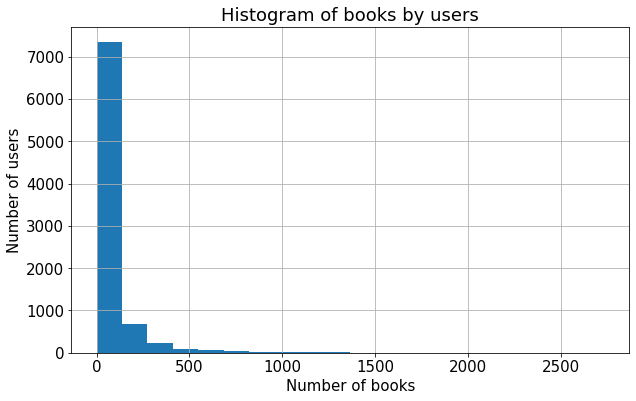

In [26]:
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 15})
reviews_df.groupby("book_id").count()['user_id'].hist(bins=20)
plt.title("Histogram of books by users")
plt.xlabel("Number of books")
plt.ylabel("Number of users")


array([[<AxesSubplot:title={'center':'rating'}>]], dtype=object)

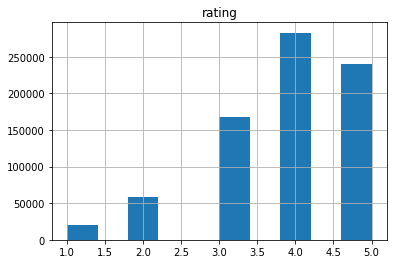

In [18]:
 reviews_df.hist()